## Using Clustering to Detect Weather Clusters

In [98]:
import pandas as pd
import numpy as np

# ML tools
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.cluster import SpectralClustering 
from scipy.spatial import distance

# plotting
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import calendar

In [99]:
def my_kmeans():
    pass

# code from hw3
def kmeans_sklearn(data, k):
    km_alg = KMeans(n_clusters=k)
    fit1 = km_alg.fit(data)
    labels = fit1.labels_
    
    return labels

def spectral_sklearn(data, k):
    sc_alg = SpectralClustering(n_clusters=k)
    fit1 = sc_alg.fit(data)
    labels = fit1.labels_
    
    return labels

# code from lab 6
def standardize(data):
    '''Standardize a dataframe'''
    mean_vec = np.mean(data, axis=0)
    sd_vec = np.std(data, axis=0)

    data_std = data.copy()
    for i in range(data.shape[1]): # for every column
        data_std[:,i] = (data[:,i] - mean_vec[i]*np.ones(data.shape[0]))/sd_vec[i]
        
    return data_std

## Using Weather Data for Raleigh, NC

What weather clusters come up when we remove temporal indicators, such as dates and seasons?
12 seasons joke
https://twitter.com/durhamnc/status/1217887940417814529?lang=en

In [100]:
# import data
weather_pd = pd.read_csv('../data/weather.csv', index_col = 0)

In [101]:
weather_pd.head()

,YEAR,MONTH,DAY,SEASON,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP
0,2000,1,1,0,47.6,38.1,1023.7,999.9,8.3,3.0,10.1,0.0,66.9,33.1,0.00,0.0
1,2000,1,2,0,55.3,46.3,1024.2,999.9,9.5,4.8,14.0,0.0,70.0,33.1,0.00,0.0
2,2000,1,3,0,62.6,55.4,1021.3,999.9,8.4,8.5,14.0,0.0,73.9,43.0,0.00,0.0
3,2000,1,4,0,65.2,58.6,1014.4,999.9,9.5,15.3,28.0,35.9,73.9,55.0,0.00,0.0
4,2000,1,5,0,45.7,30.9,1019.8,999.9,9.8,6.4,11.1,18.1,57.9,37.0,0.34,0.0


In [103]:
# convert to numpy
weather = weather_pd.drop(['YEAR', 'DAY', 'STP', 'GUST'], axis=1).to_numpy() # MONTH', 'SEASON' kept for now
weather_std = standardize(weather)

# drop station pressure bc redundant with sea level and not collected in 2000, 2002, 2004
# and drop max gust because missing for half the days and somewhat redundant w/ mxspd

## Summarize in 2d

In [104]:
# (for plotting)
pca = PCA(n_components=2)
weather_two = pca.fit_transform(weather_std)

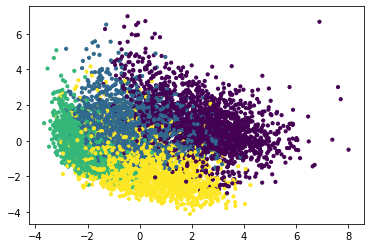

In [131]:
# plot weather - not huge separation, but can see seasons
plt.scatter(weather_two[:,0], weather_two[:,1], c=weather_pd['SEASON'], s=10)

## sklearn implementations

In [129]:
np.random.seed(452)

# K-Means standardized

labels_kmeans = kmeans_sklearn(weather_std, 12)

In [107]:
# borrowing calendar plotting from https://dzone.com/articles/plotting-a-calendar-in-matplotlib
def plot_calendar(days, months, colors, year):
    plt.figure(figsize=(9, 3))
    # colors from https://mycolor.space/
    COLORS = ['#845EC2', '#D65DB1', '#FF6F91', '#FF9671', '#FFC75F', '#F9F871',
              '#9BDE7E', '#4BBC8E', '#039590', '#1C6E7D', '#2F4858', '#676A8B'] # 12 colors for now
    ax = plt.gca().axes
    # plot days
    for d, m, c in zip(days, months, colors):
        ax.add_patch(Rectangle((d, m), 
                               width=.8, height=.8, color=COLORS[c]))
    plt.yticks(np.arange(1, 13)+.5, list(calendar.month_abbr)[1:])
    plt.xticks(np.arange(1,32)+.5, np.arange(1,32))
    plt.xlim(1, 32)
    plt.ylim(1, 13)
    plt.title('{} Seasons'.format(year))
    plt.gca().invert_yaxis()
    # remove borders and ticks
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.tick_params(top=False, bottom=False, left=False, right=False)
    plt.show()

In [108]:
def plot_labels(weather_pd, labels, year):
    # add new season labels to data
    weather_pd['NEW_SEASON'] = labels
    # filter data for year
    weather_year = weather_pd[weather_pd['YEAR'] == year]
    # plot this year's calendar
    plot_calendar(weather_pd['DAY'], weather_pd['MONTH'], weather_pd['NEW_SEASON'], year)

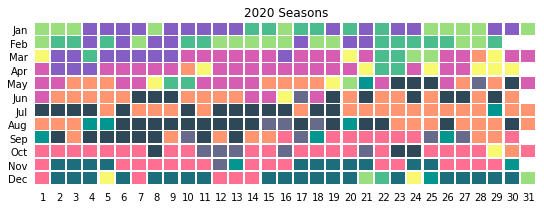

In [130]:
# plot 2020

plot_labels(weather_pd, labels_kmeans, 2020)

In [110]:
# Spectral Clustering standardized

labels_spect = spectral_sklearn(weather_std, 12)

/opt/anaconda3/envs/ml-tensor/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:294: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


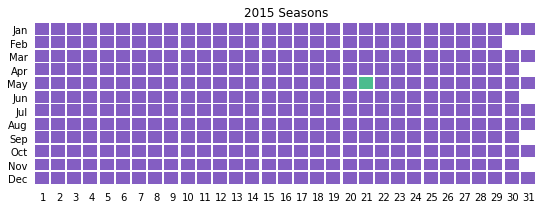

In [111]:
plot_labels(weather_pd, labels_spect, 2015)

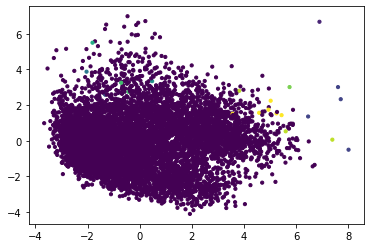

In [112]:
plt.scatter(weather_two[:,0], weather_two[:,1], c=labels_spect, s=10)